# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()
df.Occupation = df.Occupation.str.strip()

In [2]:
df['Education Level'] = df['Education Level'].str.strip()
df['Marital Status'] = df['Marital Status'].str.strip()
df['Favorite Color'] = df['Favorite Color'].str.strip()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           131 non-null    object
 1   Age              131 non-null    int64 
 2   Height (cm)      131 non-null    int64 
 3   Weight (kg)      131 non-null    int64 
 4   Occupation       131 non-null    object
 5   Education Level  131 non-null    object
 6   Marital Status   131 non-null    object
 7   Income (USD)     131 non-null    int64 
 8   Favorite Color   131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [4]:
df['Gender'] = df['Gender'].astype('category')
df['Favorite Color'] = df['Favorite Color'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           131 non-null    category
 1   Age              131 non-null    int64   
 2   Height (cm)      131 non-null    int64   
 3   Weight (kg)      131 non-null    int64   
 4   Occupation       131 non-null    object  
 5   Education Level  131 non-null    category
 6   Marital Status   131 non-null    category
 7   Income (USD)     131 non-null    int64   
 8   Favorite Color   131 non-null    category
dtypes: category(4), int64(4), object(1)
memory usage: 6.6+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

## Assign X,Y

In [7]:
df['Gender'].replace({'male' : 0, 'female' : 1}, inplace = True)
X = df.drop(columns=['Gender','Occupation', 'Education Level', 'Marital Status', 'Favorite Color'], axis = 1)
y = df['Gender']

## Train-test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Visualize & speculate on training dataset

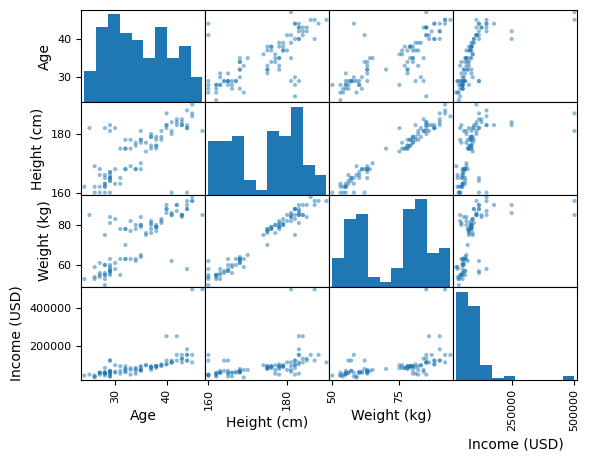

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(X_train)
plt.show()

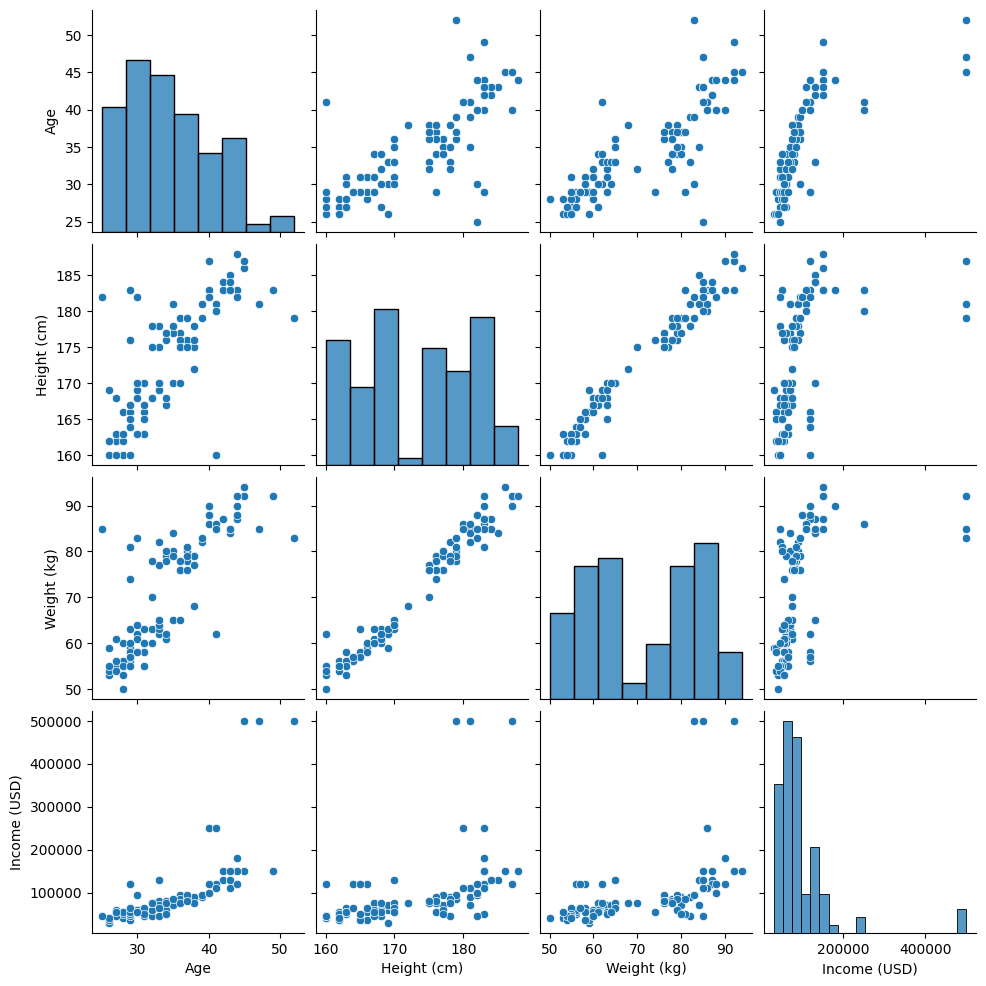

In [19]:
sns.pairplot(X_train)

<AxesSubplot: >

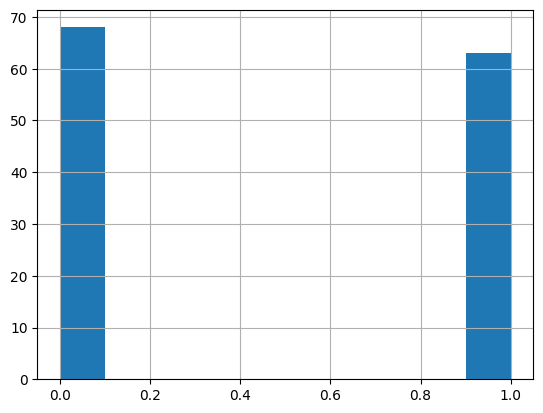

In [8]:
df.Gender.hist()

## Train a logistic regression model

In [14]:
y_train

39     1
106    1
16     1
119    0
68     1
      ..
86     0
1      0
130    1
14     1
78     1
Name: Gender, Length: 98, dtype: category
Categories (2, int64): [1, 0]

In [15]:
lr_model = LogisticRegression(max_iter = 15000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

## Evaluate the model, roc score

In [17]:
y_pred_proba = lr_model.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC score:', roc_score)

ROC score: 1.0


## Explain Findings

#### The roc score tells us how well the model can distinguish between the two classes (male and female) based on the given features. A roc score of 0.5 indicates that the model is performing no better than random guessing, while a score of 1.0 indicates perfect classification. In general, a roc score above 0.8 is considered good.